In [2]:
import pandas as pd
import numpy as py
import matplotlib as plt

### Goals of This notebook training
-  get all incoming calls
-  gel all answered calls
-  get abandoned calls
-  average customer satisfacton
-  agents above cSat
-  top agents by cSat
-  month with most abondoned calls
-  month with highest cSat

In [52]:
df = pd.read_csv('01 Call-Center-Dataset (2).csv')
print(df.head())
print(df.info())

  Call Id    Agent        Date      Time              Topic Answered (Y/N)  \
0  ID0001    Diane  2021-01-01   9:12:58   Contract related              Y   
1  ID0002    Becky  2021-01-01   9:12:58  Technical Support              Y   
2  ID0003  Stewart  2021-01-01   9:47:31   Contract related              Y   
3  ID0004     Greg  2021-01-01   9:47:31   Contract related              Y   
4  ID0005    Becky  2021-01-01  10:00:29    Payment related              Y   

  Resolved  Speed of answer in seconds AvgTalkDuration  Satisfaction rating  
0        Y                       109.0         0:02:23                  3.0  
1        N                        70.0         0:04:02                  3.0  
2        Y                        10.0         0:02:11                  3.0  
3        Y                        53.0         0:00:37                  2.0  
4        Y                        95.0         0:01:00                  3.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries,

1-  all incoming calls

In [4]:

all_incoming_calls = df['Answered (Y/N)'].count()
print(all_incoming_calls)

5000


2-  all answered calls

In [5]:
answerd_calls  = df[df['Answered (Y/N)'] == 'Y']
all_answerd_calls = answerd_calls['Answered (Y/N)'].count()
print(all_answerd_calls)

4054


3- all abandoned calls

In [6]:
abandoned_calls = df[df['Answered (Y/N)'] == 'N']
all_abandoned_calls = abandoned_calls['Answered (Y/N)'].count()
print(all_abandoned_calls)

946


4- average customer satisfaction 

In [7]:
no_null = df.dropna()
average_cSat = round(no_null['Satisfaction rating'].mean(), 2)
print(no_null['Satisfaction rating'].describe())
print(average_cSat)

count    4054.000000
mean        3.403552
std         1.212220
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Satisfaction rating, dtype: float64
3.4


#### 5- agents above cSat average:
   first try to get all unique agents to know the total of agents in the dataset then calculate each agent average customer
satisfaction and determine which avg is below the total avg

      name  avg_cSat
1   Martha      3.47
6      Dan      3.45
5    Diane      3.41
0  Stewart      3.40
4     Greg      3.40
3      Jim      3.39
7    Becky      3.37
2      Joe      3.33


<AxesSubplot: xlabel='name'>

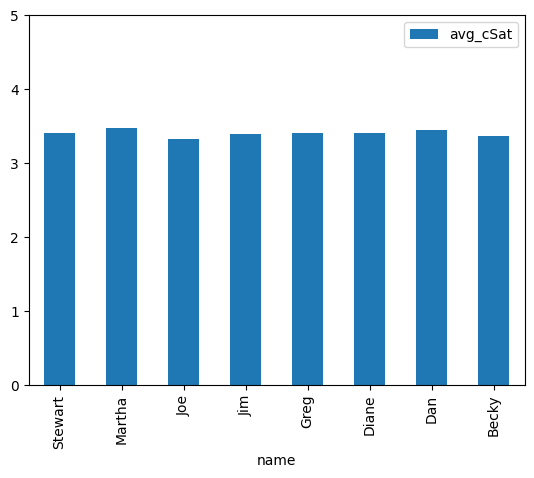

In [8]:
## sort data by cSat:
sorted_df = no_null.sort_values(['Satisfaction rating', 'Agent'], ascending=False)

## agents names in the dataset:
agents = sorted_df['Agent'].unique()


## calculate each agent average customer satisfaction and put them in a list
agent_avg_cSat = []
def calls_per_agent(agents_arr):
    for agent in agents_arr:
        single_agent = sorted_df[sorted_df['Agent'] == agent]
        avg_cSat_per_agent = round(single_agent['Satisfaction rating'].mean(), 2)
        agent_avg_cSat.append([agent, avg_cSat_per_agent])
    
calls_per_agent(agents)

agents_avg_cfm = pd.DataFrame(agent_avg_cSat, columns=['name', 'avg_cSat'])
print(agents_avg_cfm.sort_values(['avg_cSat', 'name'], ascending=False))

agents_avg_cfm.plot(x="name", y="avg_cSat", kind="bar", ylim=(0,5))

-  agents above cSat avg

In [9]:
above_cSat_avg = agents_avg_cfm[agents_avg_cfm['avg_cSat'] > average_cSat]
print(above_cSat_avg)

     name  avg_cSat
1  Martha      3.47
5   Diane      3.41
6     Dan      3.45


6- months with highest cSat and months with most abandoned calls

-  months with most abandoned calls

In [10]:
### replacing months with relevant number to calculate them
for i in df['Date']:
    if '-01-' in i:
        df['Date'].replace(i, '1', inplace=True)
    if '-02-' in i:
        df['Date'].replace(i, '2', inplace=True)
    if '-03-' in i:
        df['Date'].replace(i, '3', inplace=True)

<AxesSubplot: xlabel='month'>

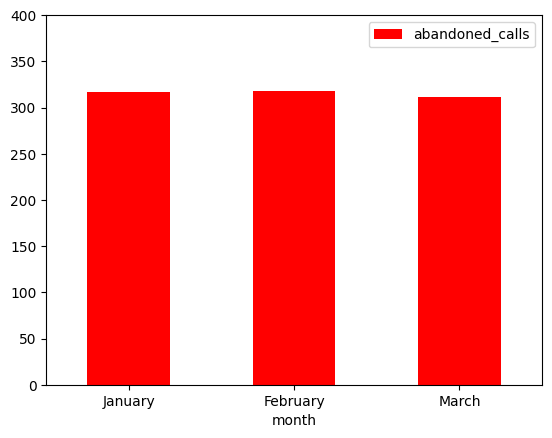

In [51]:
## each month data
january = df[df['Date'] == '1']
february = df[df['Date'] == '2']
march = df[df['Date'] == '3']

## each month abandoned calls
january_abandoned_calls = january[january['Answered (Y/N)'] == 'N']['Answered (Y/N)'].count()
february_abandoned_calls = february[february['Answered (Y/N)'] == 'N']['Answered (Y/N)'].count()
march_abandoned_calls = march[march['Answered (Y/N)'] == 'N']['Answered (Y/N)'].count()

months = ['January', 'February', 'March']
abandoned_calls = [january_abandoned_calls, february_abandoned_calls, march_abandoned_calls]
data = []

for i, j in zip(months, abandoned_calls):
    data.append({'month': i, 'abandoned_calls': j})

months_df = pd.DataFrame(data)

months_df.plot(x="month", y="abandoned_calls", kind="bar", ylim=(0,400) , color='red', rot=0)

In [18]:
print(january['Satisfaction rating'].dropna().describe())
print(february['Satisfaction rating'].dropna().describe())
print(march['Satisfaction rating'].dropna().describe())

count    1455.000000
mean        3.454296
std         1.177129
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Satisfaction rating, dtype: float64
count    1298.000000
mean        3.377504
std         1.232752
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Satisfaction rating, dtype: float64
count    1301.000000
mean        3.372790
std         1.229195
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Satisfaction rating, dtype: float64
